In [6]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
     (LinearDiscriminantAnalysis as LDA,
      QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [4]:
weekly = load_data('Weekly')

In [5]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


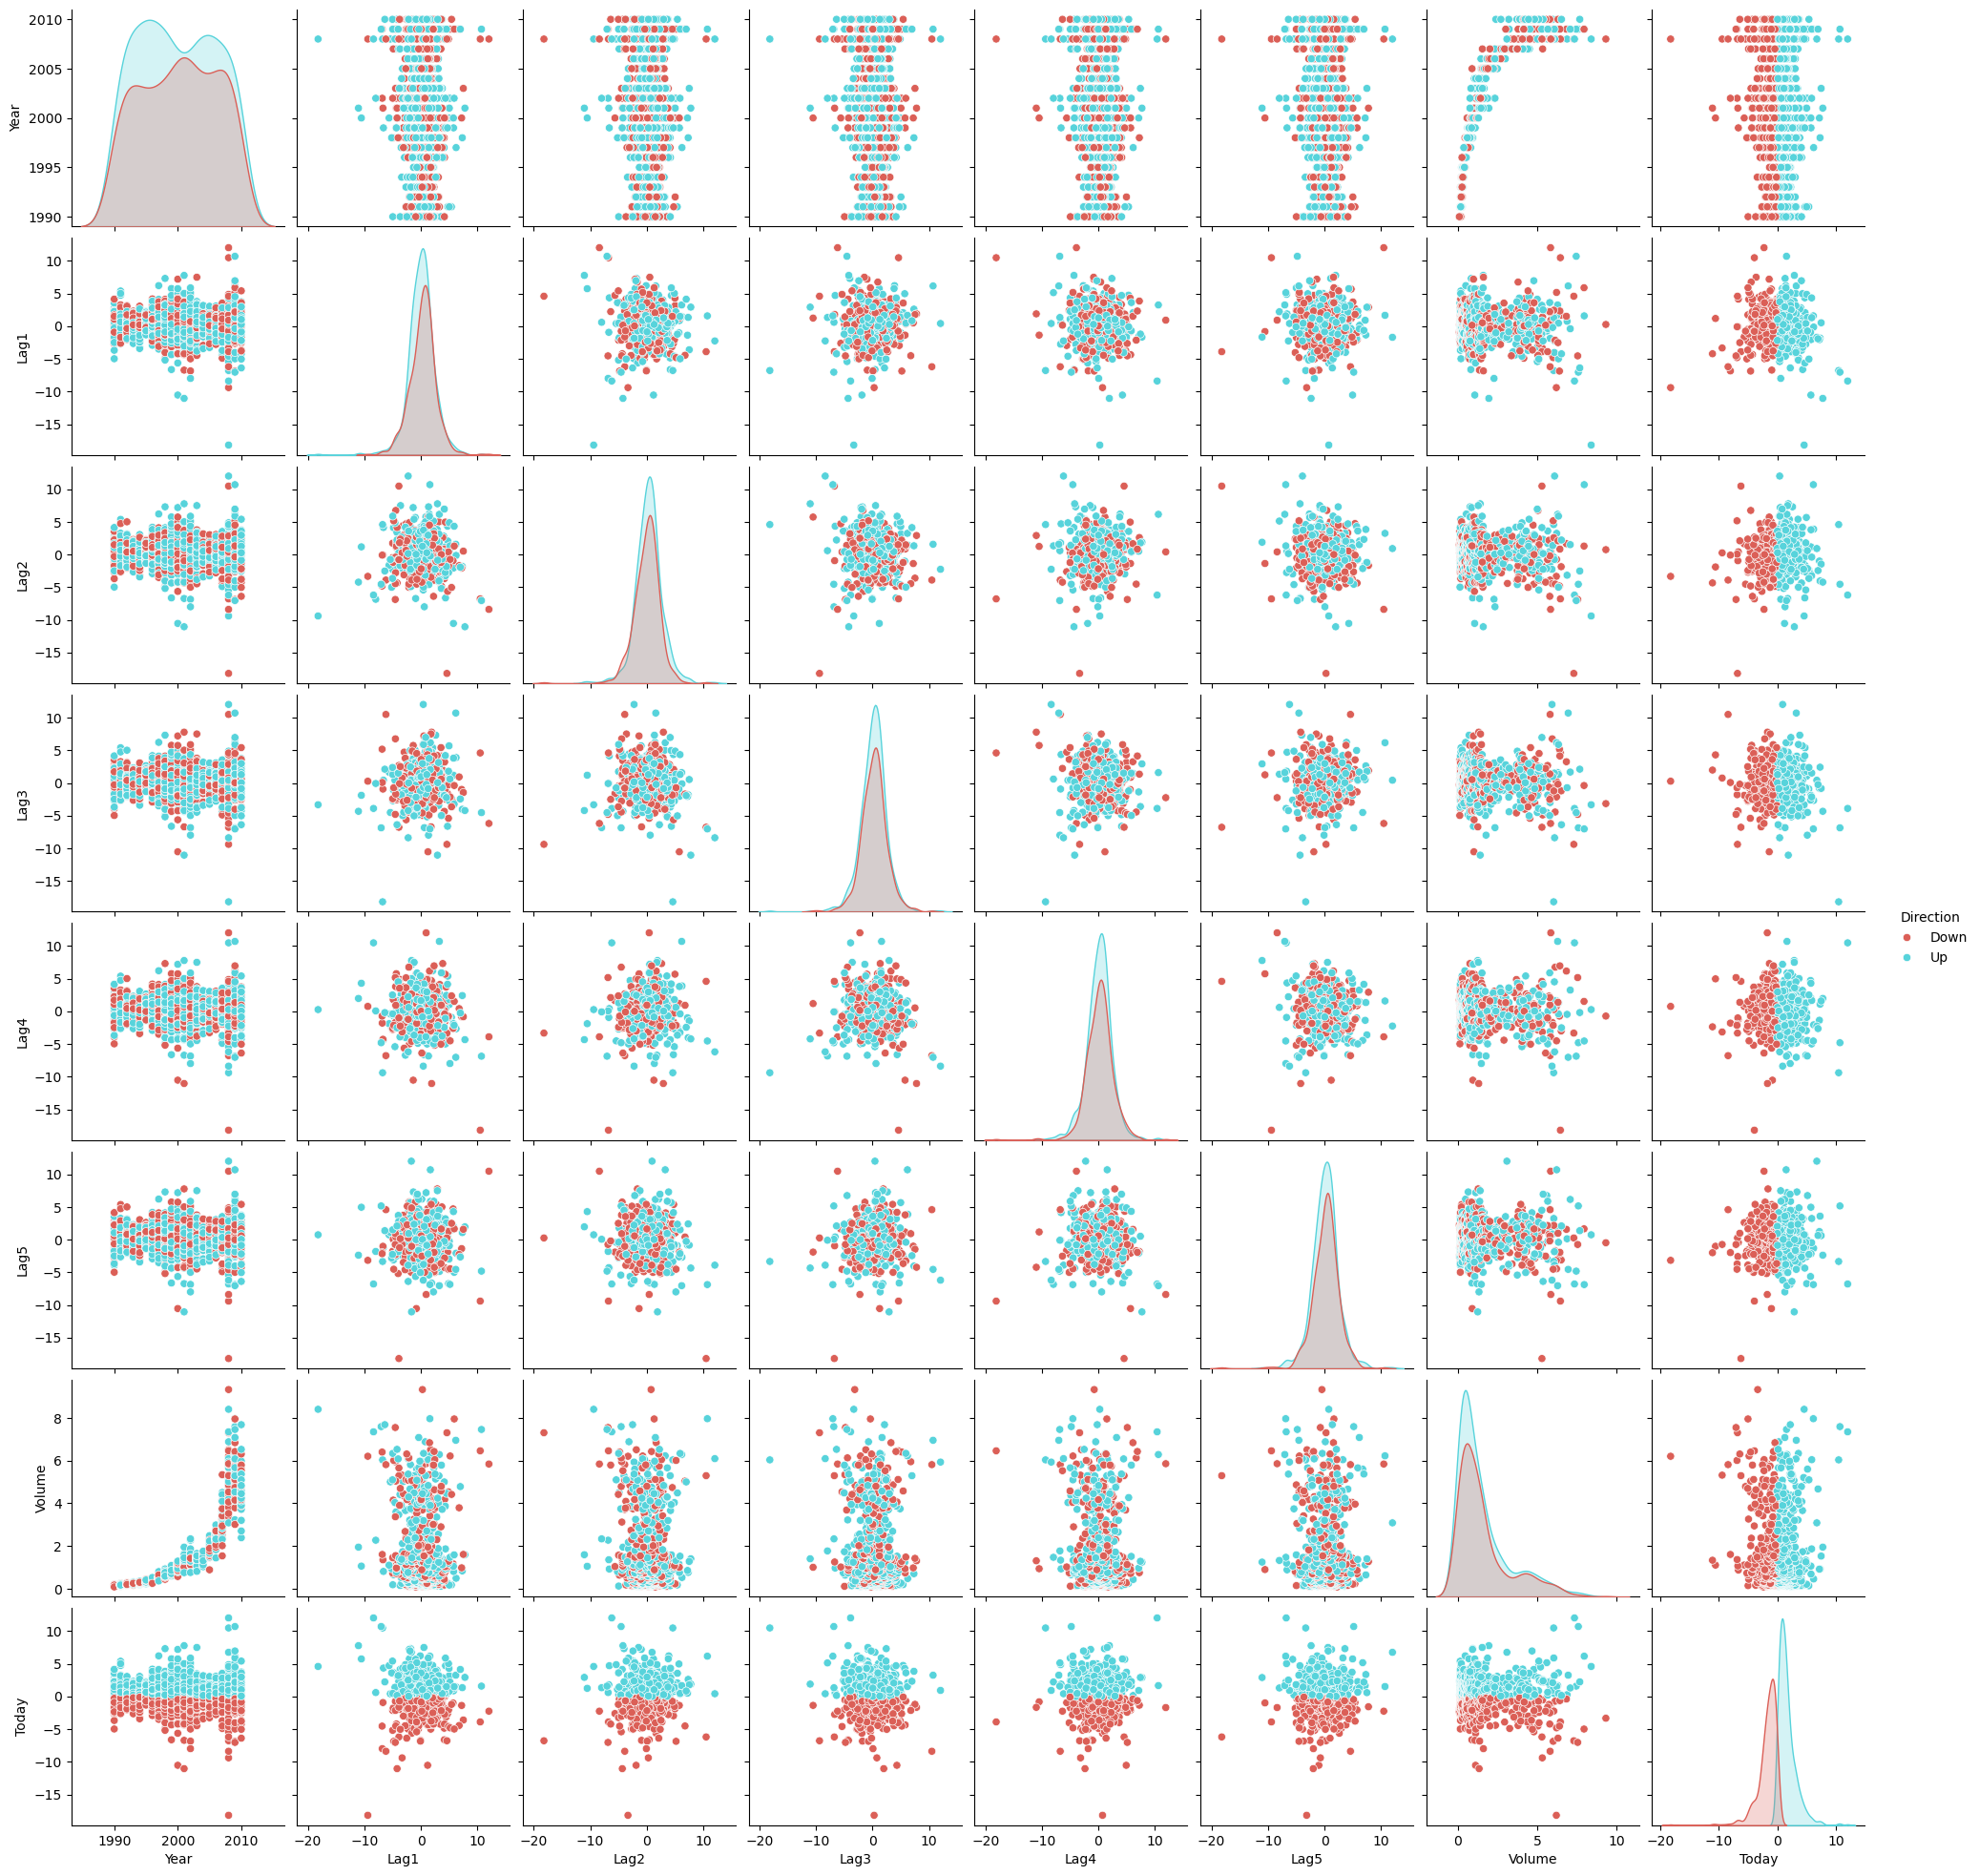

In [9]:
sns.pairplot(weekly, diag_kind="kde", hue="Direction", palette="hls")

In [14]:
weekly.()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


<Axes: >

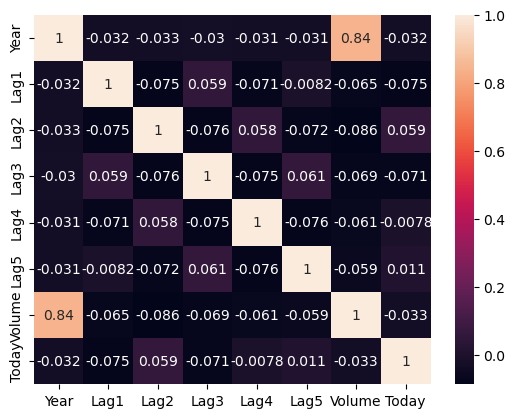

In [18]:
sns.heatmap(weekly.corr(numeric_only=True), annot=True)

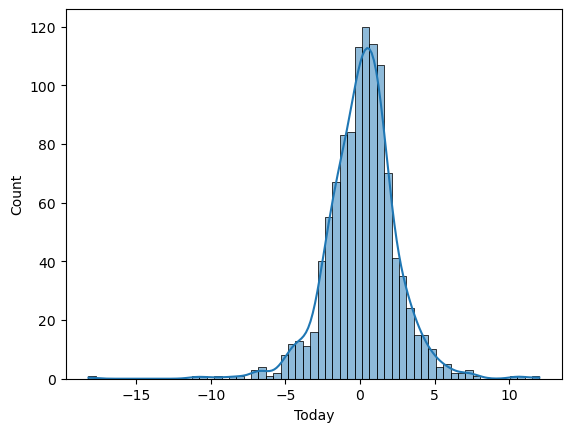

In [30]:
sns.histplot(weekly["Today"], kde=True, stat='count');

In [ ]:
model = LogisticRegression(C=10000000000)
y = weekly["Direction"].replace(["Up", "Down"], [1,0])
x = weekly.drop(columns=["Direction","Today"])
model.fit(x,y)

In [44]:
model.coef_ , model.classes_

(array([[ 0.00013367, -0.04128761,  0.05841795, -0.01607351, -0.02780023,
         -0.01447728, -0.02311913]]),
 array(['Down', 'Up'], dtype=object))

In [54]:
log_reg = sm.Logit(y, x).fit()

Optimization terminated successfully.
         Current function value: 0.682444
         Iterations 4


In [56]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 31 Aug 2025   Pseudo R-squ.:                0.006576
Time:                        15:59:03   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1316
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Year           0.0001   4.31e-05      3.105      0.002    4.93e-05       0.000
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.603      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0231      0.037     -0.625      0.532      -0.096       0.049
==============================================================================
"""

<Axes: xlabel='Lag2', ylabel='Count'>

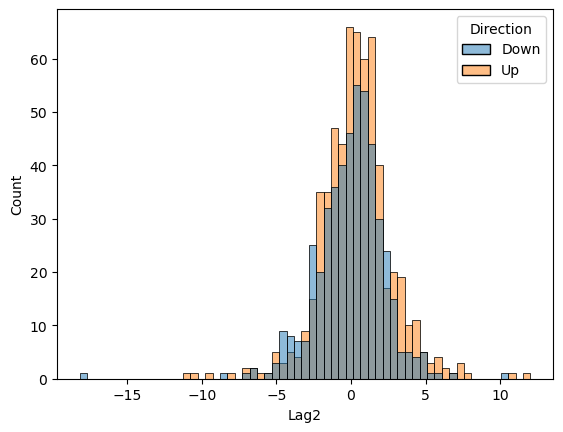

In [62]:
sns.histplot(weekly, x="Lag2", hue="Direction")

In [70]:
probs = log_reg.predict()
labels = np.array(['Down'] * len(probs))
labels[probs > 0.5] = "Up"

In [73]:
confusion_table(labels, weekly.Direction)

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557
